<h1 style="text-align:center; color: black; font-family: Arial;">Deep Learning for Finance</h1>

<span style="text-align:center; color: black; font-family: Arial;">
VIX - Indice de volatilidad, utiliza el precio del S&P 500, un valor VIX más alto correlaciona con una mayor incertidumbre, mientras que un valor bajo se correlaciona con estabilidad</span>    

In [3]:
#!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00


In [4]:
# Importing the required library
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [5]:
# Setting the beginning and end of the historical data
start_date = '1990-01-01'
end_date   = '2024-07-20'
# Creating a dataframe and downloading the VIX data
vix = pdr.DataReader('VIXCLS', 'fred', start_date, end_date)
# Printing the latest five observations of the dataframe
print(vix.tail())

            VIXCLS
DATE              
2024-07-15   13.12
2024-07-16   13.19
2024-07-17   14.48
2024-07-18   15.93
2024-07-19   16.52


In [6]:
# Calculating the number if nan values
count_nan = vix['VIXCLS'].isnull().sum()
# Printing the result
print('Number of nan values in the VIX dataframe: ' + str(count_nan))

Number of nan values in the VIX dataframe: 296


In [7]:
# Dropping the nan values from the rows 
vix = vix.dropna()

In [8]:
vix.head(10)

,VIXCLS
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
1990-01-09,22.20
1990-01-10,22.44
1990-01-11,20.05
1990-01-12,24.64


In [9]:
pd.date_range('2024-01-01', periods=4)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'], dtype='datetime64[ns]', freq='D')

In [10]:
# Crear una serie temporal con un índice de tiempo
time_series = pd.Series([10, 20, 30, 40], index=pd.date_range('2024-01-01', periods=4))

# Calcular la diferencia entre los períodos
diff_series = time_series.diff()

print(diff_series)

2024-01-01     NaN
2024-01-02    10.0
2024-01-03    10.0
2024-01-04    10.0
Freq: D, dtype: float64


In [11]:
# Taking the differences in an attempt to make the data stationary
vix = vix.diff(periods = 1, axis = 0)
vix = vix.iloc[1: , :]

In [12]:
vix.tail()

,VIXCLS
DATE,
2024-07-15,0.66
2024-07-16,0.07
2024-07-17,1.29
2024-07-18,1.45
2024-07-19,0.59


In [13]:
# Calculating the mean of the dataset
mean = vix['VIXCLS'].mean()
# Printing the result
print('The mean of the dataset = ' + str(mean))

The mean of the dataset = -8.259722381553233e-05


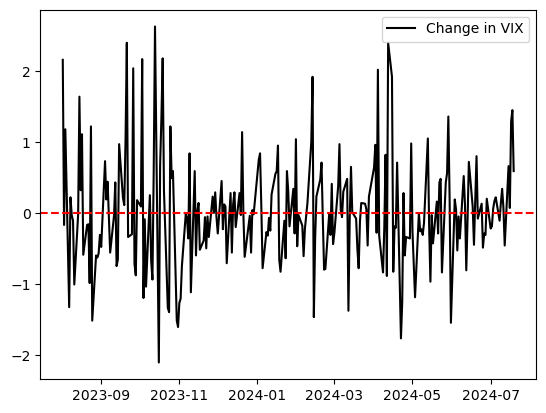

In [14]:
# Plotting the latest 250 observations in black with a label 
plt.plot(vix[-250:], color = 'black', linewidth = 1.5, label = 'Change in VIX')
# Plotting a red dashed horizontal line that is equal to mean 
plt.axhline(y = mean, color = 'red', linestyle = 'dashed')
# Calling the legend function so it appears with the chart 
plt.legend()
# Calling the plot 
plt.show()

<div style="text-align: justify ">El IPC mide los precios que pagan mensualmente los consumidores urbanos por una selección de
productos y servicios; cada mes se hace pública una nueva observación, formando así una serie temporal
continua. La tasa de inflación entre dos períodos cualesquiera se mide mediante cambios porcentuales
en el índice de precios. Por ejemplo, si el precio del pan el año pasado fue de \$ 1,00 y el precio actual es
de \$ 1,01, entonces la inflación es del 1,00%. El IPC normalmente se publica año tras año, lo que significa
que se informa como la diferencia entre la observación mensual actual y la observación de hace 12
meses.</div>

In [15]:
# Importing the required library
import pandas_datareader as pdr

In [16]:
# Setting the beginning and end of the historical data
start_date = '1950-01-01'
end_date   = '2024-07-23'

In [17]:
# Cerating a dataframe and downloading the CPI data
cpi = pdr.DataReader('CPIAUCSL','fred', start_date, end_date)
print(cpi.tail())

            CPIAUCSL
DATE                
2024-02-01   311.054
2024-03-01   312.230
2024-04-01   313.207
2024-05-01   313.225
2024-06-01   313.049


In [18]:
count_nan = cpi['CPIAUCSL'].isnull().sum()
print('Number of nan values in the CPI dataframe: ', str(count_nan))

Number of nan values in the CPI dataframe:  0


In [19]:
cpi['CPIAUCSL'].shape[0]

894

In [20]:
cpi

,CPIAUCSL
DATE,
1950-01-01,23.510
1950-02-01,23.610
1950-03-01,23.640
1950-04-01,23.650
1950-05-01,23.770
...,...
2024-02-01,311.054
2024-03-01,312.230
2024-04-01,313.207


In [21]:
# Calcular el cambio porcentual entre los elementos
cpi['cambio_porcentual'] = cpi.pct_change(periods = 12, axis = 0) * 100

In [22]:
cpi.head(20)

,CPIAUCSL,cambio_porcentual
DATE,,
1950-01-01,23.51,NaN
1950-02-01,23.61,NaN
1950-03-01,23.64,NaN
1950-04-01,23.65,NaN
1950-05-01,23.77,NaN
1950-06-01,23.88,NaN
1950-07-01,24.07,NaN
1950-08-01,24.20,NaN
1950-09-01,24.34,NaN


Los primeros 12 valores en la columna cambio_porcentual son NaN porque no hay suficientes datos anteriores (12 períodos) para calcular el cambio porcentual.
Para el 01 de enero de 1951, el cambio porcentual es: <br>
 <b>((25.38-23.51)/23.51) * 100 = 0.07954062 o 7.954062% </b>

In [23]:
# Dropping the nan values from the rows
cpi = cpi.dropna()

In [24]:
cpi['CPIAUCSL'].shape[0]

882

El cambio interanual es la transformación más observada en el IPC, ya que proporciona una medida clara y sencilla del cambio en el nivel general de precios durante un período de tiempo suficiente para tener en cuenta las oscilaciones a corto plazo y los impactos estacionales.

In [25]:
cpi.iloc[-240:]

,CPIAUCSL,cambio_porcentual
DATE,,
2004-07-01,189.100,2.939575
2004-08-01,189.200,2.547425
2004-09-01,189.800,2.539168
2004-10-01,190.800,3.190914
2004-11-01,191.700,3.621622
...,...,...
2024-02-01,311.054,3.165743
2024-03-01,312.230,3.475131
2024-04-01,313.207,3.357731


The mean of the dataset: 2.5948701123662485 %


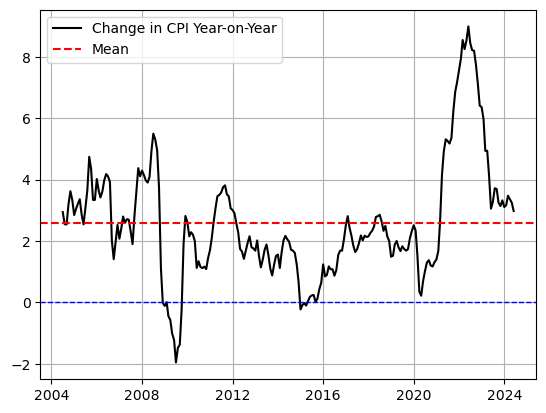

In [29]:
# Calculating the mean of the CPI over the last 20 years 
cpi_latest = cpi.iloc[-240:]
mean = cpi_latest['cambio_porcentual'].mean()
# Printing the result
print('The mean of the dataset: ' + str(mean), '%')
# Importing the required library
import matplotlib.pyplot as plt
# Plotting horizontal lines that represent the mean and the zero threshold
plt.plot(cpi_latest['cambio_porcentual'], color = 'black', linewidth = 1.5, label = 'Change in CPI Year-on-Year')
plt.axhline(y = mean, color = 'red', linestyle = 'dashed', label = 'Mean') 
plt.axhline(y = 0, color = 'blue', linestyle = 'dashed', linewidth = 1) 
plt.grid()
plt.legend()


US CPI year-on-year values since 2003, with the higher dashed line representing the mean

The median of the dataset: 2.1936679914508095 %


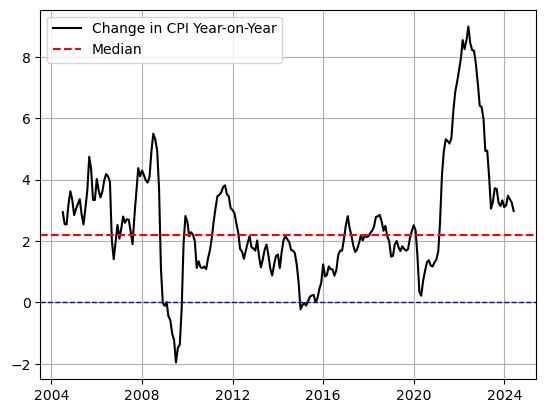

In [32]:
# Calculating the median
median = cpi_latest['cambio_porcentual'].median()
# printing the result
print('The median of the dataset: ' + str(median), '%')
# Plotting the latest observations in black with a label 
plt.plot(cpi_latest['cambio_porcentual'], color = 'black', linewidth = 1.5, label = 'Change in CPI Year-on-Year')
# Plotting hotizontal lines than represent the median and the zero threshold
plt.axhline(y = median, color = 'red', linestyle = 'dashed', label= 'Median')
plt.axhline(y = 0, color = 'blue', linestyle = 'dashed', linewidth = 1)
plt.grid()
plt.legend()

In [34]:
# Calculating the variance
varianza = cpi_latest["cambio_porcentual"].var()
# Printing the result 
print('The variance of the dataset: '+ str(varianza), '%')

The variance of the dataset: 3.749828232450517 %


In [35]:
# Calculating the standard deviation
standard_deviation = cpi_latest["cambio_porcentual"].std()
# Printing the result
print("The standard deviation of the dataset: " + str(standard_deviation), '%')

The standard deviation of the dataset: 1.936447322405264 %


En promedio, los valores interanuales del IPC tienden a ubicarse en ±1,90% de la media del mismo período

In [37]:
# Calculating the range
range_metric = max(cpi_latest["cambio_porcentual"]) - min(cpi_latest["cambio_porcentual"])
# Printing the result
print("The range of the dataset: " + str(range_metric), '%')

The range of the dataset: 10.948504745079923 %


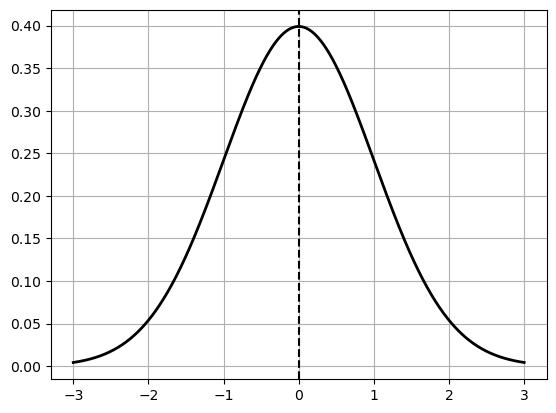

In [42]:
# Importing libraries 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats 
# Generate data for the plot 
data = np.linspace(-3, 3, num  = 1000)
mean = 0 
std = 1
# Generate the function of the normal distribution
pdf = stats.norm.pdf(data, mean, std)
# Plot the normal distribution plot 
plt.plot(data, pdf, '-', color = 'black', lw = 2)
plt.axvline(mean, color = 'black', linestyle = '--')
plt.grid()
plt.show()

In [44]:
# Calculating the skew
sesgo = cpi_latest['cambio_porcentual'].skew()
# Printing the result
print("The skew of the dataset: " + str(sesgo))

The skew of the dataset: 1.0148782582857376


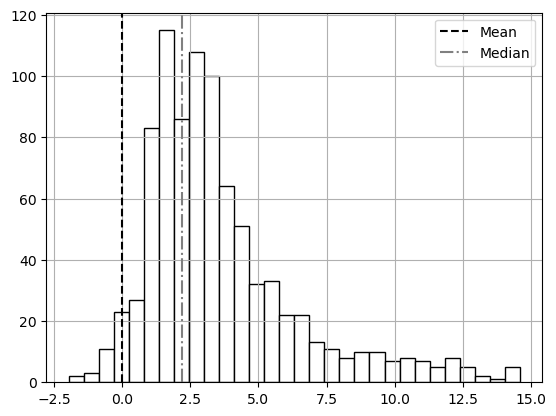

In [48]:
# Plotting the histogram of the data
# Esta función devuelve una tupla que contiene una referencia a la figura (fig) y una matriz o lista de ejes (ax) 
# sobre los que se pueden dibujar gráficos.
fig, ax = plt.subplots()
ax.hist(cpi['cambio_porcentual'], bins = 30, edgecolor = 'black', color = 'white')
# Add vertical lines for better interpretation
ax.axvline(mean, color = 'black', linestyle = '--', label = 'Mean')
ax.axvline(median, color = 'grey', linestyle = '-.', label = 'Median')
plt.grid()
plt.legend()
plt.show()

¿Qué significa un sesgo positivo? En este caso, representa datos muy sesgados (en el lado positivo), lo que está en línea con una política monetaria que favorece la inflación a medida que la economía crece (con algunos picos inflacionarios que causan el sesgo)

In [49]:
# Calculating the excess kurtosis
exceso_kurtosis = cpi_latest['cambio_porcentual'].kurtosis()
# Printing the result
print("The excess kurtosis of the dataset: " + str(exceso_kurtosis))

The excess kurtosis of the dataset: 1.6852832943536522


### Visualización de datos

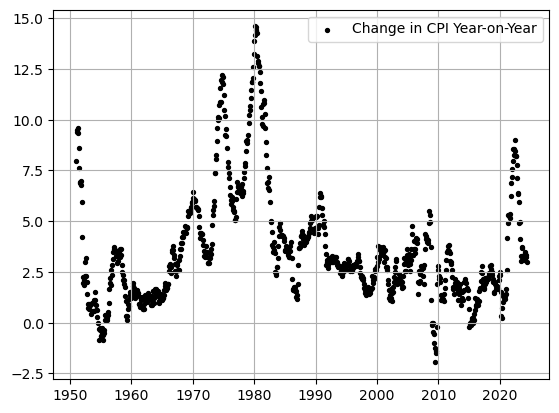

In [52]:
# Importing the required library
import matplotlib.pyplot as plt 
# Resetting the index
cpi = cpi.reset_index()
# Creating the chart
fig, ax = plt.subplots()
ax.scatter(cpi['DATE'], cpi['cambio_porcentual'], color = 'black', s = 8, label = 'Change in CPI Year-on-Year')
plt.grid()
plt.legend()
plt.show()

Scatterplot of US CPI data versus the time axis

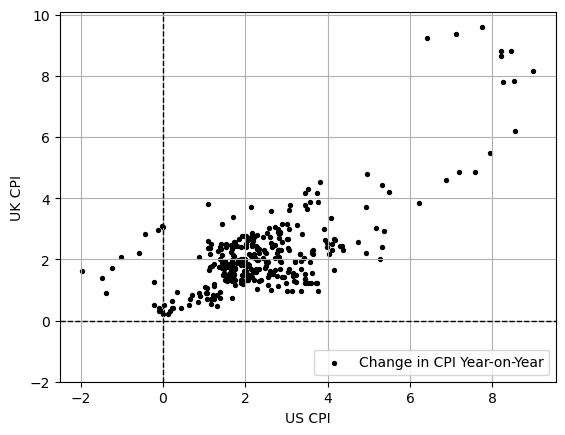

In [54]:
# Setting the beginning and end of the historical data
start_date = '1995-01-01'
end_date   = '2022-12-01'
# Creating a dataframe and downloading the CPI data 
cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)
# Dropping the NaN values from the rows 
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()
# Transforming the CPI into a year-on-year measure
cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()
# Creating the chart 
fig, ax = plt.subplots()
ax.scatter(cpi_us['CPIAUCSL'], cpi_uk['GBRCPIALLMINMEI'], color = 'black', s = 8, label = 'Change in CPI Year-on-Year')
# Adding a few aesthetic elements to the chart
ax.set_xlabel('US CPI')
ax.set_ylabel('UK CPI')
ax.axvline(x = 0, color = 'black', linestyle = 'dashed', linewidth = 1)
ax.axhline(y = 0, color = 'black', linestyle = 'dashed', linewidth = 1)
ax.set_ylim(-2,)
plt.grid()
plt.legend()
plt.show()

 Diagrama de dispersión de los datos del IPC del Reino Unido frente a los datos del IPC de EE. UU

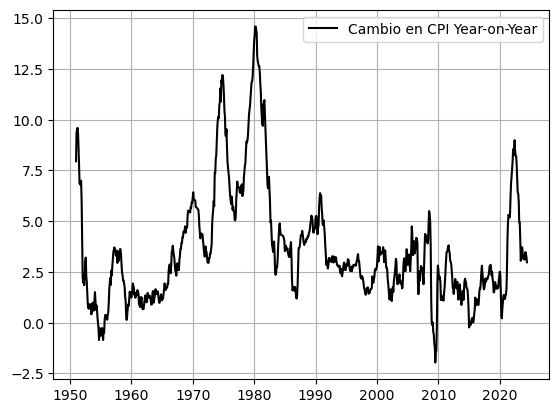

In [56]:
# Creating the chart
plt.plot(cpi['DATE'], cpi['cambio_porcentual'], color = 'black', label = 'Cambio en CPI Year-on-Year')
plt.grid()
plt.legend()
plt.show()

Gráfico de líneas de los datos del IPC de EE. UU. frente al eje temporal

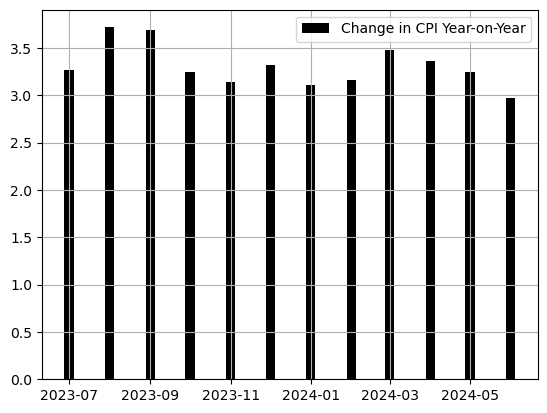

Gráfico de barras de los datos del IPC de EE. UU. frente al eje temporal


In [59]:
# Taking the values of the previous twelve months
cpi_one_year = cpi.iloc[-12:]
# Creating the chart 
plt.bar(cpi_one_year['DATE'], cpi_one_year['cambio_porcentual'], color = 'black', label = 'Change in CPI Year-on-Year', width = 7)
plt.grid()
plt.legend()
plt.show()
print("Gráfico de barras de los datos del IPC de EE. UU. frente al eje temporal")

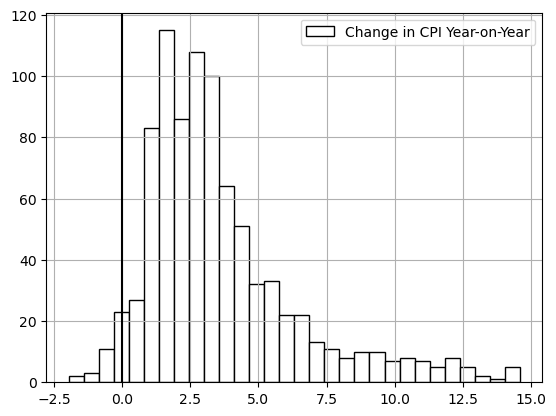

Gráfico de histograma de los datos del IPC de EE. UU


In [63]:
# Creating the chart
fig, ax = plt.subplots()
ax.hist(cpi['cambio_porcentual'], bins = 30, edgecolor = 'black', color = 'white', label = 'Change in CPI Year-on-Year')
# Add vertical lines for better interpretation
ax.axvline(0, color = 'black')
plt.grid()
plt.legend()
plt.show()
print("Gráfico de histograma de los datos del IPC de EE. UU")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


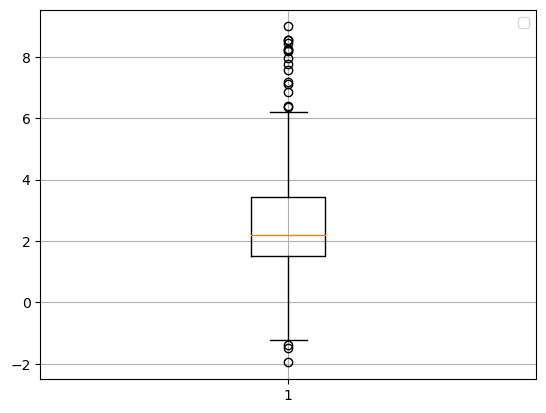

Box and whisker plot of US CPI data


In [67]:
# Creating the chart
cpi_latest = cpi.iloc[-240:]
fig, ax = plt.subplots()
ax.boxplot(cpi_latest['cambio_porcentual'])
plt.grid()
plt.legend()
plt.show()
print("Box and whisker plot of US CPI data")

Para eliminar los valores atípicos del gráfico, simplemente utilice el siguiente ajuste:

Box and whisker plot of US CPI data with no outliers


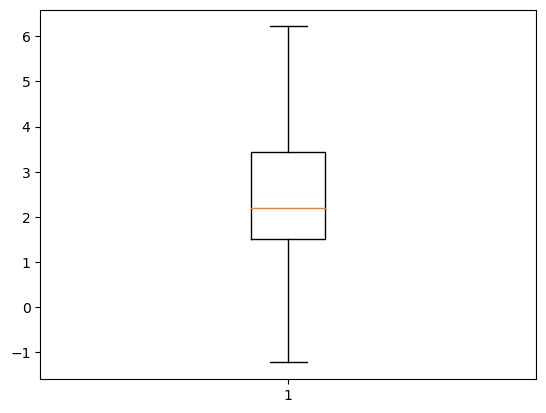

In [68]:
# Replace the corresponding code line with the following
fig, ax = plt.subplots()
ax.boxplot(cpi_latest['cambio_porcentual'], showfliers = False)
print("Box and whisker plot of US CPI data with no outliers")

In [ ]:
import pandas_datareader as pdr
import pandas as pd 
# Setting the beginning and end of the historical data 
start_date = '1995-01-01'
end_date   = '2024-07-27'
# Creating a dataframe and downloading the CPI data
cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)
# Dropping the nan values from the rows 
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()
# Transforming the US CPI into a year-on-year measure
cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()
# Transforming the US CPI into a year-on-year measure
cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()
# Joining both CPI data into one dataframe
combined_cpi_data = pd.concat([cpi_us['CPIAUCSL'], cpi_uk['GBRCPIALLMINMEI']], axis = 1)
# Calculating Pearson correlation
combined_cpi_data.corr(method = 'pearson')

In [71]:
combined_cpi_data.corr(method = 'spearman')

,CPIAUCSL,GBRCPIALLMINMEI
CPIAUCSL,1.000000,0.524488
GBRCPIALLMINMEI,0.524488,1.000000


La correlación de Pearson mide la relación lineal (tendencia) entre las variables mientras que la correlación de rango de Spearman mide la tendencia monótona. <br>
La palabra monótono se refiere a moverse en la misma dirección pero no exactamente al mismo ritmo o magnitud. Además, la correlación de rangos de Spearman transforma los datos a un tipo ordinal (a través de los rangos) a diferencia de la correlación de Pearson, que utiliza los valores reales.

In [73]:
# Creating a dataframe and downloading the CPI data
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
# Transforming the US CPI into a year-on-year measure
cpi = cpi.pct_change(periods = 12, axis = 0) * 100
cpi = cpi.dropna()
# Transforming the data frame to a series structure
cpi = cpi.iloc[:,0]
# Calculating autocorrelation with a lag of 1 
print('Correlation with a lag of 1 = ', round(cpi.autocorr(lag = 1), 2 ))
# Calculating autocorrelation with a lag of 6 
print('Correlation with a lag of 6 = ', round(cpi.autocorr(lag = 6), 2 ))
# Calculating autocorrelation with a lag of 12 
print('Correlation with a lag of 12 = ', round(cpi.autocorr(lag = 12), 2 ))

Correlation with a lag of 1 =  0.97
Correlation with a lag of 6 =  0.66
Correlation with a lag of 12 =  0.26


Un retraso de 12 significa que cada valor de datos se compara con los datos de hace 12 períodos y luego se calcula una medida de correlación

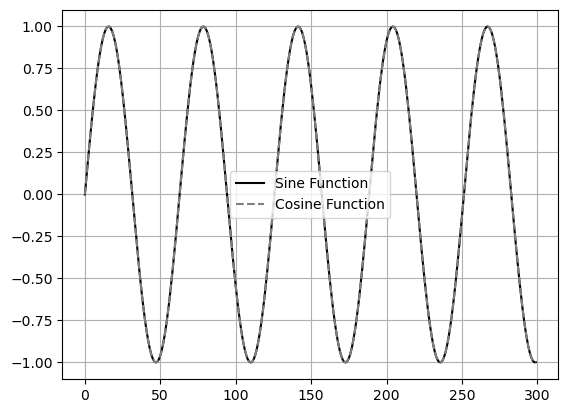

In [74]:
# Importing the required libraries 
import numpy as np
import matplotlib.pyplot as plt 
# Setting the range if the data 
data_range = np.arange(0, 30, 0.1)
# Creating the sine and the cosine waves 
sine = np.sin(data_range)
cosine = np.cos(data_range)
# Plotting 
plt.plot(sine, color = 'black', label = 'Sine Function')
plt.plot(sine, color = 'grey', linestyle = 'dashed', label = 'Cosine Function')
plt.grid()
plt.legend()


The first and most basic test is the augmented Dickey—Fuller (ADF) test. This tests
for stationarity using hypothesis testing. <br>
The p-value obtained from the test must be less than the significance level chosen
(in most cases, it is 5%).

In [75]:
# Importing the required library
from statsmodels.tsa.stattools import adfuller
# Applying the ADF test on the CPI data
print('p-value: %f' % adfuller(cpi)[1])

p-value: 0.011173


let’s apply the code on the raw US CPI data and not take the year-on-year changes

In [76]:
# Creating a dataframe and downloading the CPI data
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
# Applying the ADF test on the CPI data
print('p-value: %f' % adfuller(cpi)[1])

p-value: 0.996530
